In [1]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from numpy import unique
from numpy import where
import numpy as np
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn import metrics


In [3]:
# Functions for EDA
def remove_duplicates(df):
    if(any(df.duplicated())):
        return df.drop_duplicates(keep='first')
    
    print('No duplicates')
    return df

def count_nulls(df):
    # Count the number of rows with null values
    num_rows_with_nulls = df.isnull().any(axis=1).sum()
    
    # Count the number of null values in each column
    null_counts = df.isnull().sum()
    
    return (num_rows_with_nulls, null_counts)

def plot_correlation(df, column):
    # Drop rows with missing values in the specified column
    df = df.dropna(subset=[column])
    
    # Calculate the correlation coefficients
    corr = df.corr()[[column]]
    
    # Create a bar plot
    ax = sns.barplot(data=corr, x=column, y=corr.index, orient='h')
    ax.set_title(f'Correlation between {column} and other columns')
    
    # Show the plot
    plt.show()
def plot_corr_heatmap(df, figsize=(15, 8)):
    # Create a figure with the specified size
    plt.figure(figsize=figsize)
    
    # Calculate the correlation matrix
    corr = df.corr()
    
    # Create a heatmap
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')

    # Show the plot
    plt.show()
def min_max_scale(df):
   
    scaler = MinMaxScaler()
    
    # Fit the scaler to the data
    scaler.fit(df)
    
    # Transform the data
    scaled_data = scaler.transform(df)
    
    
    scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
    
    return scaled_df

def standard_scale(df):
   
    scaler = StandardScaler()
    
    # Fit the scaler to the data
    scaler.fit(df)
    
    # Transform the data
    scaled_data = scaler.transform(df)
    
    
    scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
    
    return scaled_df

def label_categorical(data, columns_to_encode):
    le = LabelEncoder()
    
    for column in columns_to_encode:
        data[column] = le.fit_transform(data[column])
    
    return data
    
def explain_clusters(inputData, labels):
    copiedData = inputData.copy()
    copiedData['Cluster'] = labels
    for c in inputData:
        grid= sns.FacetGrid(copiedData, col='Cluster')
        grid.map(plt.hist, c)

def evaluate_clustering(labels, data):
    # Calculate Silhouette score
    silhouette_score = metrics.silhouette_score(data, labels, metric='euclidean')

    # Calculate Davies-Bouldin Index
    davies_bouldin_index = metrics.davies_bouldin_score(data, labels)

    # Calculate Calinski-Harabasz Index
    calinski_harabasz_index = metrics.calinski_harabasz_score(data, labels)

    return silhouette_score, davies_bouldin_index, calinski_harabasz_index

In [4]:
#Data preparation
cc_data_df = pd.read_csv("../dataset/CC GENERAL.csv")
cc_data_df2 = pd.read_csv("../dataset/CC Data 2.csv")

data = cc_data_df.fillna(0)
data = data.drop(["CUST_ID"], axis = 1)
data2 = remove_duplicates(df = cc_data_df2)
data2numeric = label_categorical(data2, ['Gender', 'Education Level', 'Marital Status'])
data = standard_scale(data)
data2numeric = standard_scale(data2numeric)

#Variable values
gaussian_components = 20

No duplicates


In [5]:
data.shape

(8950, 17)

In [6]:
#Function to iterate over number of clusters and collect BIC scores
gmmArray = []
def elbowReport(inputData, n = 20, initialparams = "kmeans"):
    BICscores = []
    # training gaussian mixture model 

    clusters = range(2,n)
    #predictions from gmm
    for cluster in clusters:

        gmm = GaussianMixture(n_components=cluster, init_params=initialparams)
        gmm.fit(inputData)
        BICscores.append(gmm.bic)
        labels = gmm.predict(inputData)
        gmmArray.append(gmm)
        frame = pd.DataFrame(inputData)
        frame['cluster'] = labels
        frame.columns = ['BALANCE',
         'BALANCE_FREQUENCY',
         'PURCHASES',
         'ONEOFF_PURCHASES',
         'INSTALLMENTS_PURCHASES',
         'CASH_ADVANCE',
         'PURCHASES_FREQUENCY',
         'ONEOFF_PURCHASES_FREQUENCY',
         'PURCHASES_INSTALLMENTS_FREQUENCY',
         'CASH_ADVANCE_FREQUENCY',
         'CASH_ADVANCE_TRX',
         'PURCHASES_TRX',
         'CREDIT_LIMIT',
         'PAYMENTS',
         'MINIMUM_PAYMENTS',
         'PRC_FULL_PAYMENT',
         'TENURE',
        'cluster']
        color=['blue','green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white']
        data2 = inputData
        """for k in range(0,cluster):
            data2 = frame[frame["cluster"]==k]
            plt.scatter(data2["PAYMENTS"],data2["BALANCE"],c=color[k])
        print(str(cluster) + " clusters")
        plt.show()"""
    print(BICscores)
    return BICscores

[<bound method GaussianMixture.bic of GaussianMixture(n_components=2)>, <bound method GaussianMixture.bic of GaussianMixture(n_components=3)>, <bound method GaussianMixture.bic of GaussianMixture(n_components=4)>, <bound method GaussianMixture.bic of GaussianMixture(n_components=5)>, <bound method GaussianMixture.bic of GaussianMixture(n_components=6)>, <bound method GaussianMixture.bic of GaussianMixture(n_components=7)>, <bound method GaussianMixture.bic of GaussianMixture(n_components=8)>, <bound method GaussianMixture.bic of GaussianMixture(n_components=9)>, <bound method GaussianMixture.bic of GaussianMixture(n_components=10)>, <bound method GaussianMixture.bic of GaussianMixture(n_components=11)>, <bound method GaussianMixture.bic of GaussianMixture(n_components=12)>, <bound method GaussianMixture.bic of GaussianMixture(n_components=13)>, <bound method GaussianMixture.bic of GaussianMixture(n_components=14)>, <bound method GaussianMixture.bic of GaussianMixture(n_components=15)>,

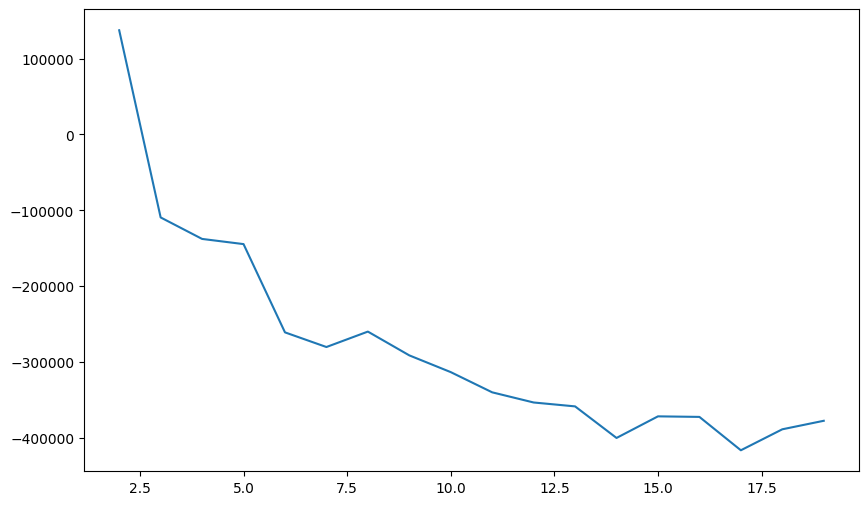

In [7]:
scores = elbowReport(data, n = gaussian_components)
BICscores = []
for i in range(0,gaussian_components - 2):
    BICscores.append(scores[i](data))
print(BICscores)
plt.figure(figsize = (10, 6))
plt.plot(range(2, gaussian_components), BICscores)

In [8]:
gmm1 = GaussianMixture(n_components=6)
gmm1.fit(data)


GaussianMixture(n_components=6)

[<bound method GaussianMixture.bic of GaussianMixture(init_params='random', n_components=2)>, <bound method GaussianMixture.bic of GaussianMixture(init_params='random', n_components=3)>, <bound method GaussianMixture.bic of GaussianMixture(init_params='random', n_components=4)>, <bound method GaussianMixture.bic of GaussianMixture(init_params='random', n_components=5)>, <bound method GaussianMixture.bic of GaussianMixture(init_params='random', n_components=6)>, <bound method GaussianMixture.bic of GaussianMixture(init_params='random', n_components=7)>, <bound method GaussianMixture.bic of GaussianMixture(init_params='random', n_components=8)>, <bound method GaussianMixture.bic of GaussianMixture(init_params='random', n_components=9)>, <bound method GaussianMixture.bic of GaussianMixture(init_params='random', n_components=10)>, <bound method GaussianMixture.bic of GaussianMixture(init_params='random', n_components=11)>, <bound method GaussianMixture.bic of GaussianMixture(init_params='r

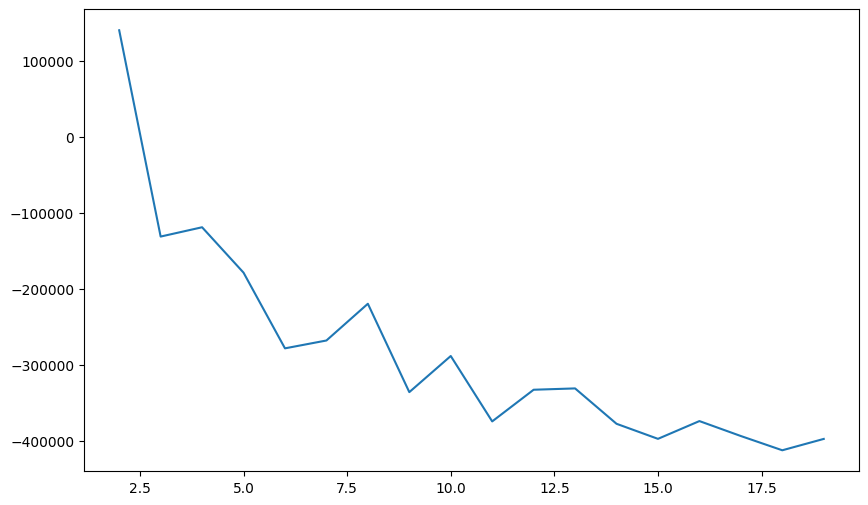

In [9]:
#Initialise GMM with random_from_data
gmmArray = []

scores = elbowReport(data, n = gaussian_components, initialparams = "random")
BICscores = []
for i in range(0,gaussian_components - 2):
    BICscores.append(scores[i](data))
print(BICscores)
plt.figure(figsize = (10, 6))
plt.plot(range(2, gaussian_components), BICscores)

C:\Users\user\AppData\Local\Temp\ipykernel_14884\3880889299.py:11: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1],


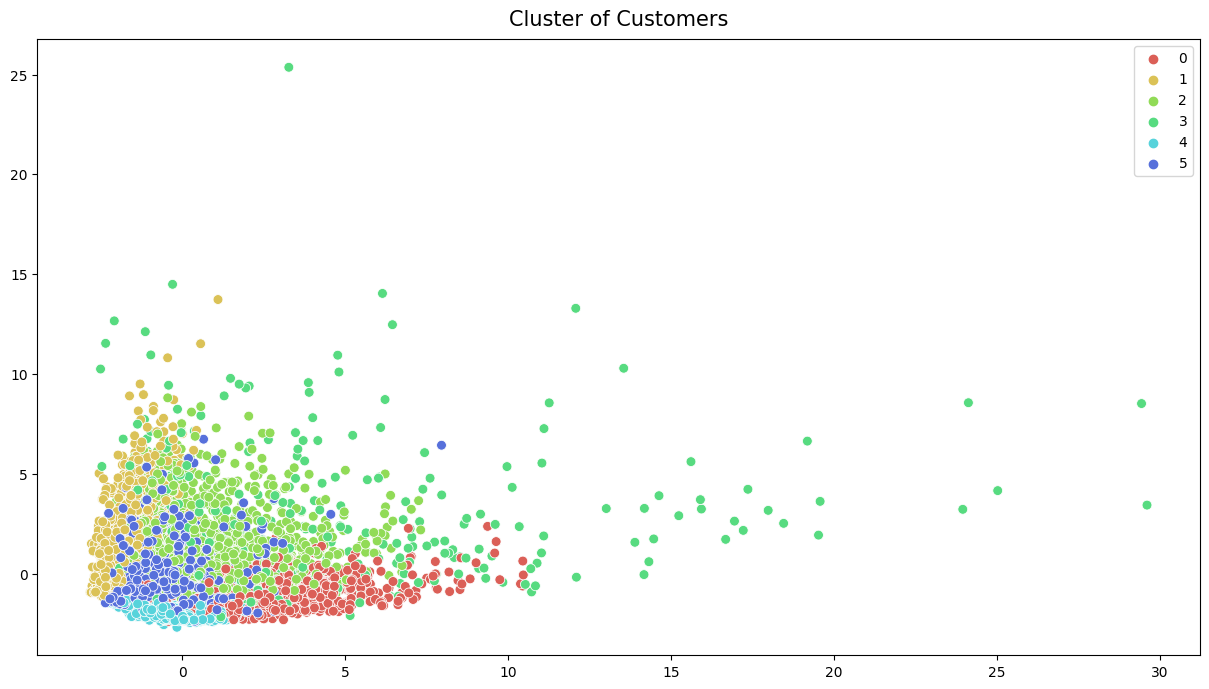

In [10]:

#Choose 9 components
cluster_labels = gmmArray[4].predict(data)

dist = 1 - cosine_similarity(data)
pca = PCA(n_components = 2)
pca.fit(dist)
X_PCA = pca.fit_transform(data)

# Visualizing all the clusters 
plt.figure(figsize=(15,8))
sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], 
                hue=cluster_labels, palette=sns.color_palette('hls', 8), s=50)
plt.title('Cluster of Customers', size=15, pad=10)
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\AppData\Local\Pr

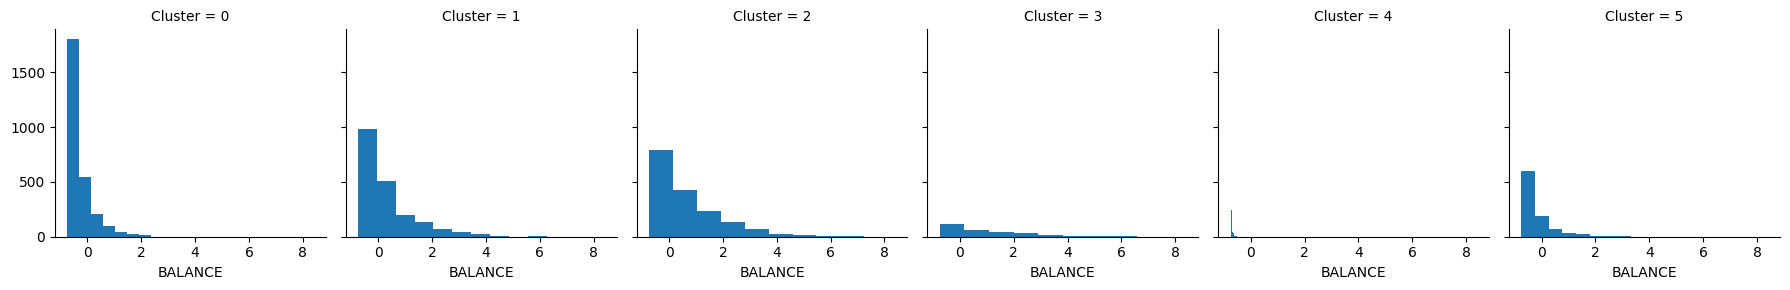

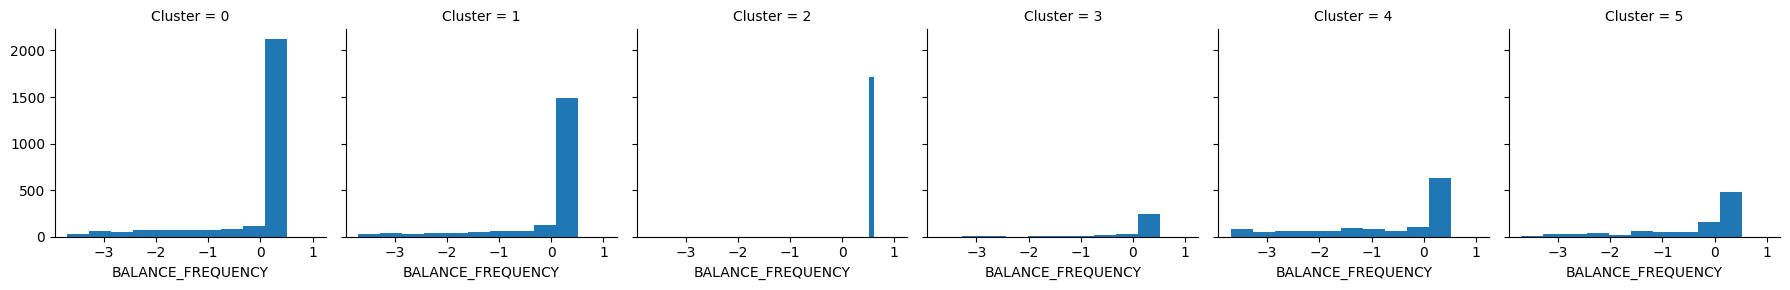

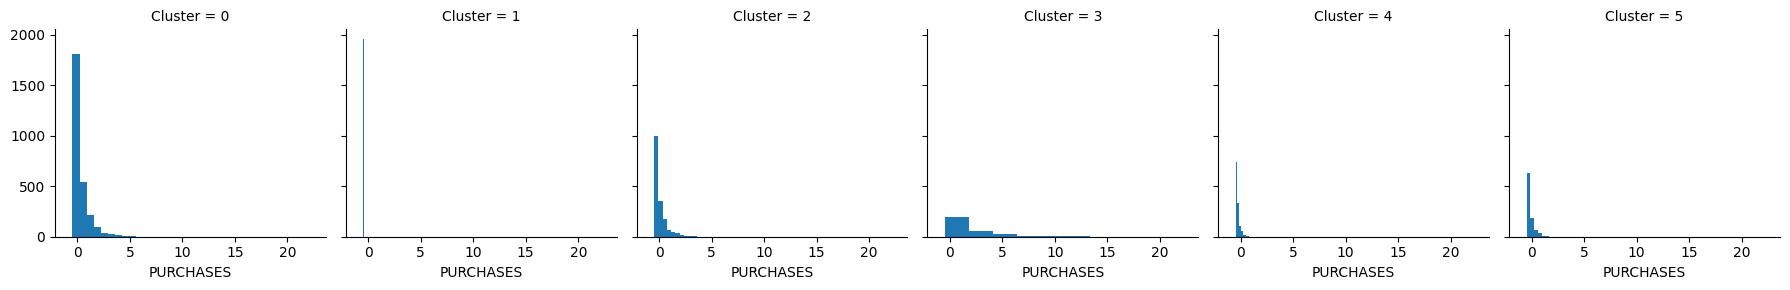

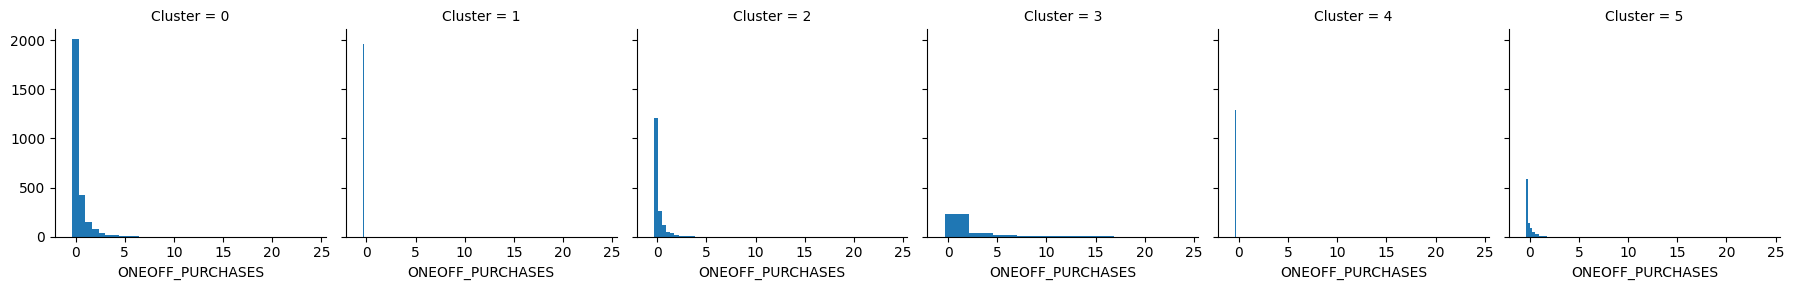

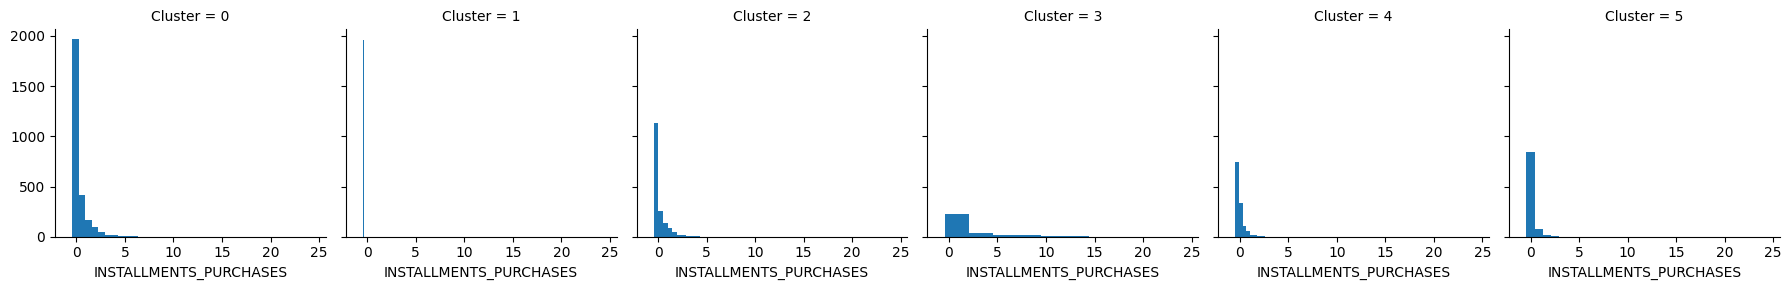

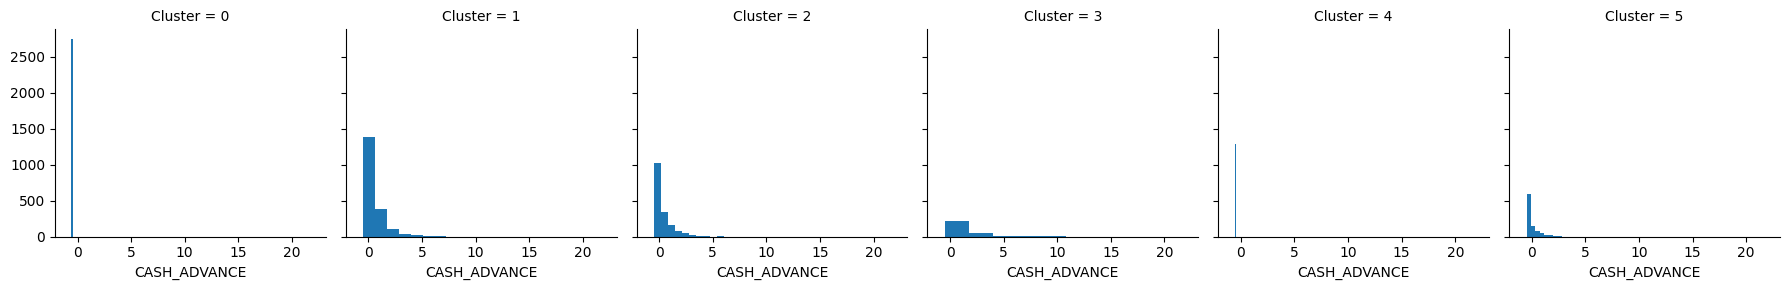

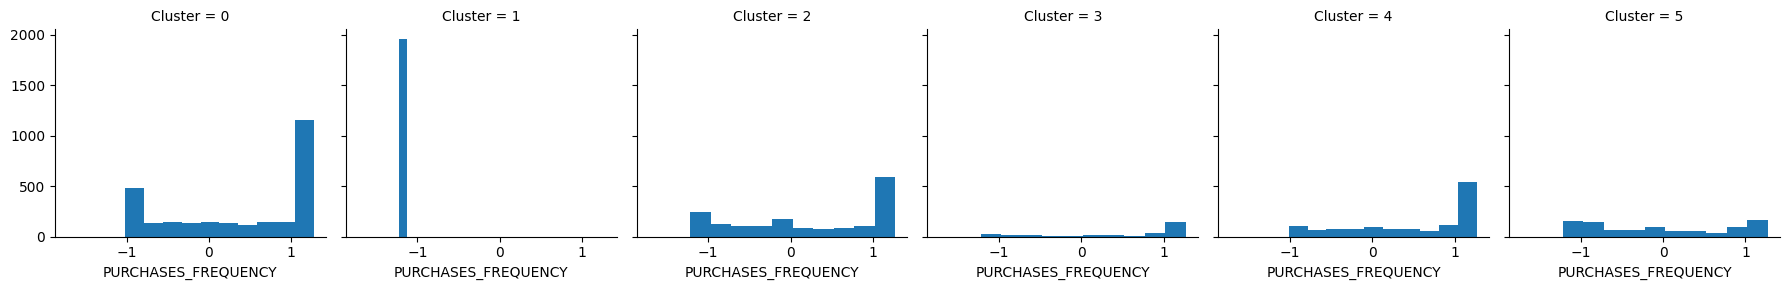

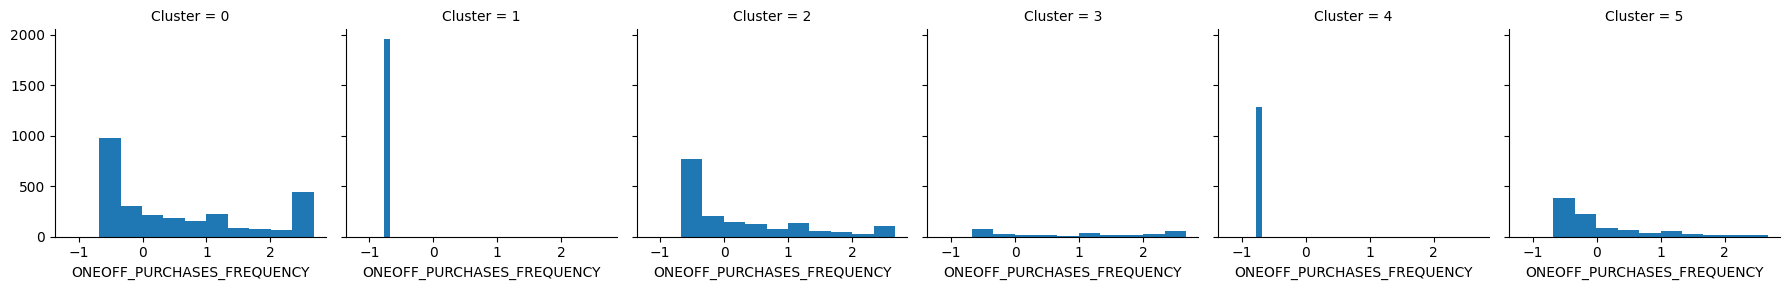

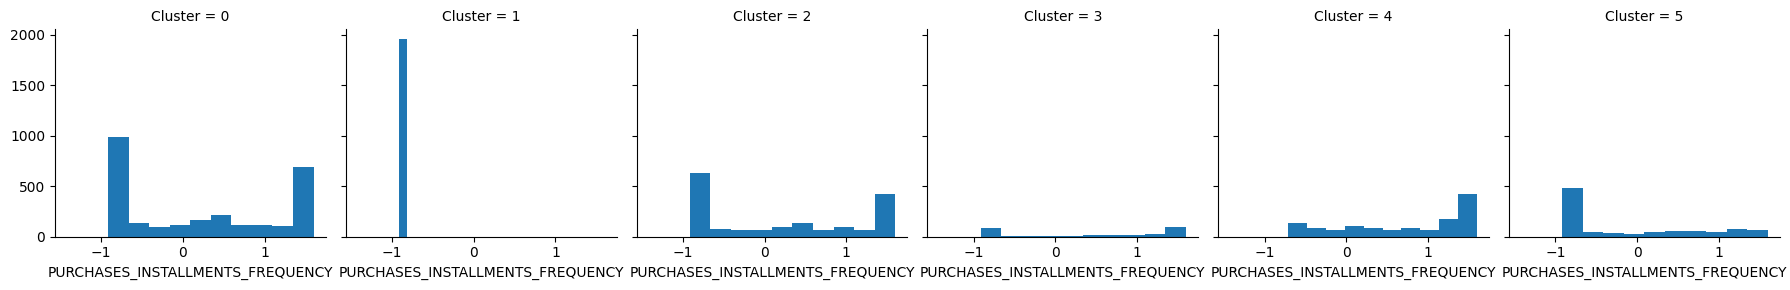

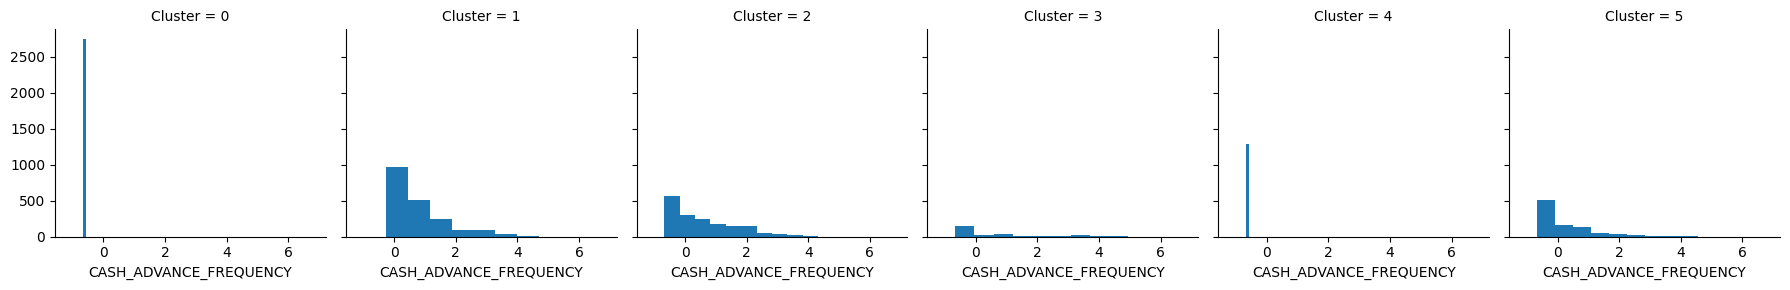

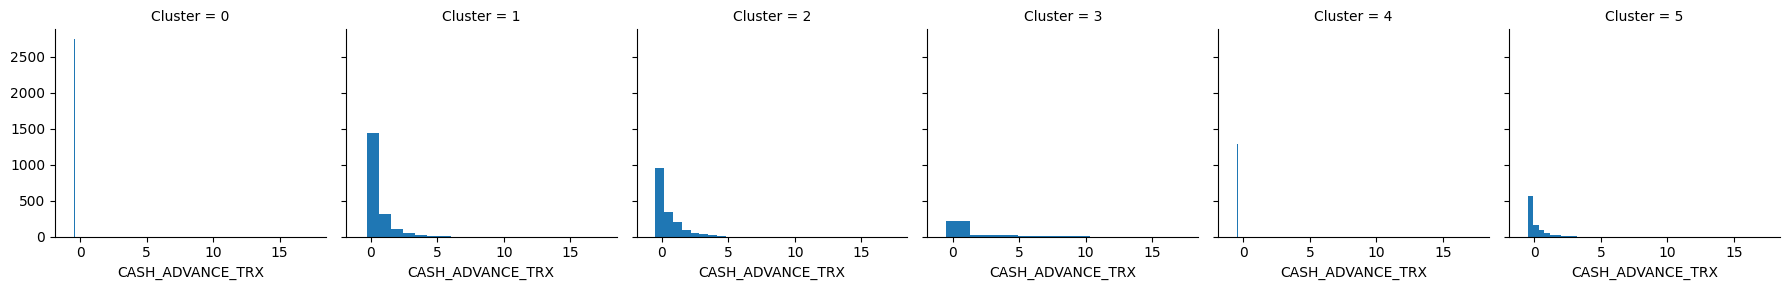

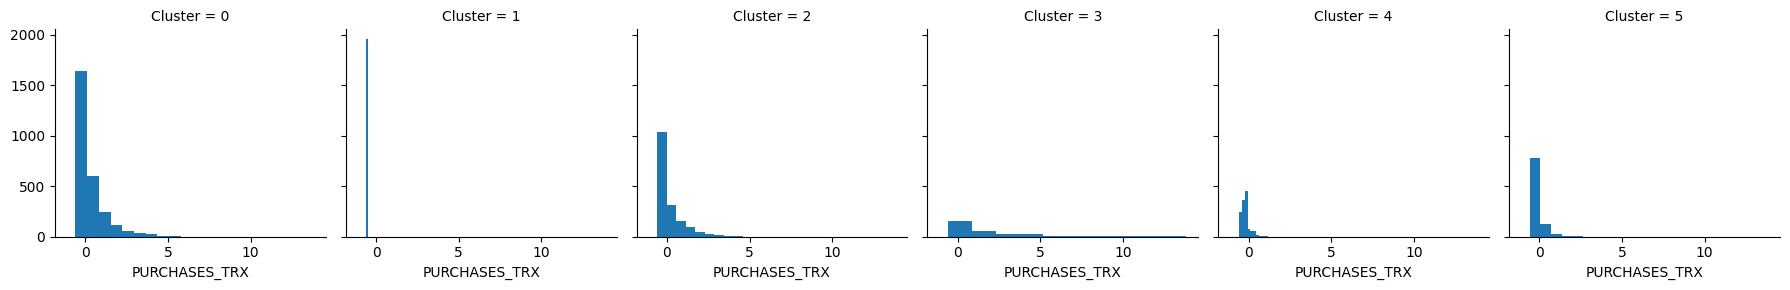

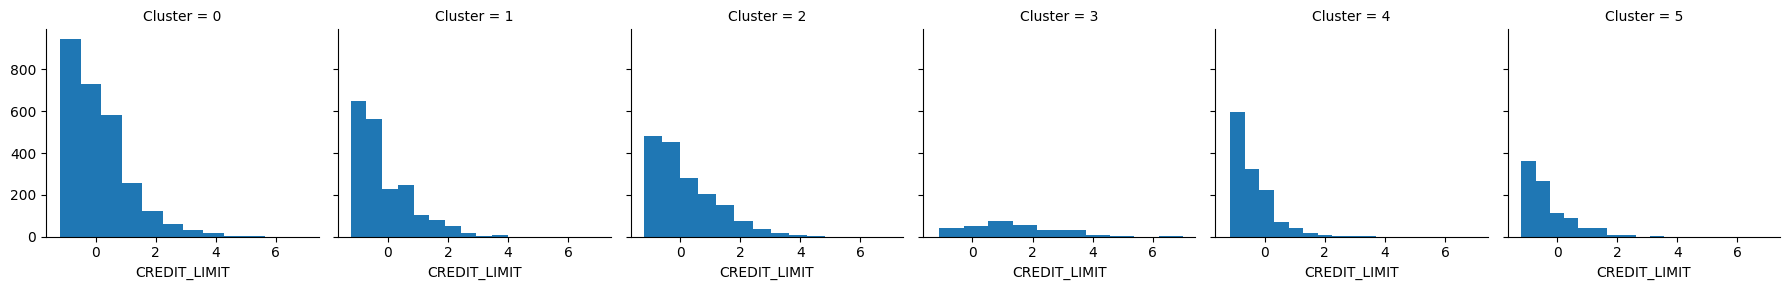

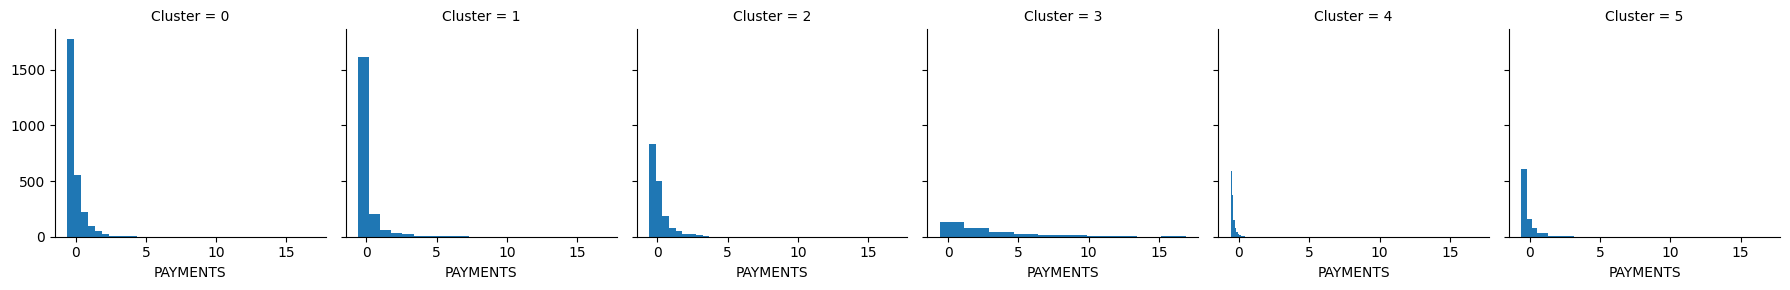

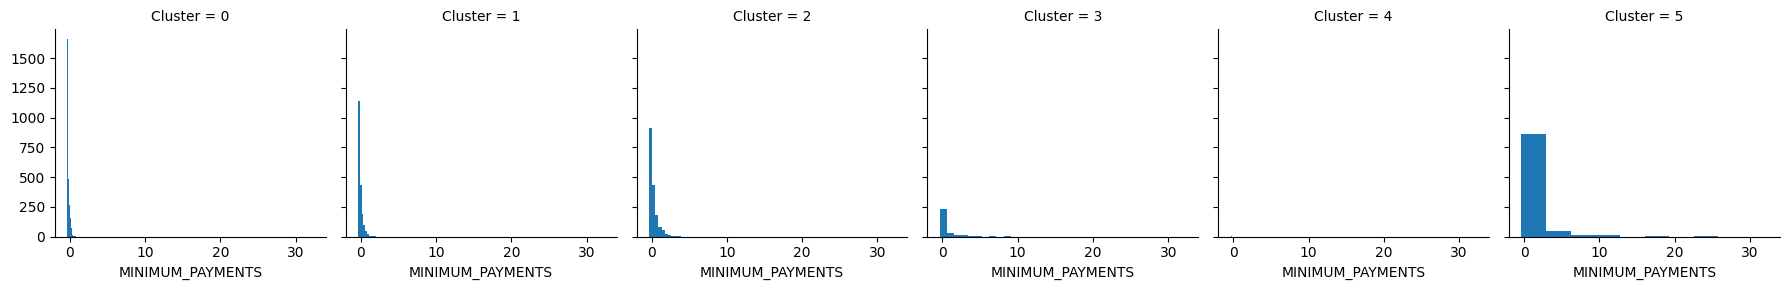

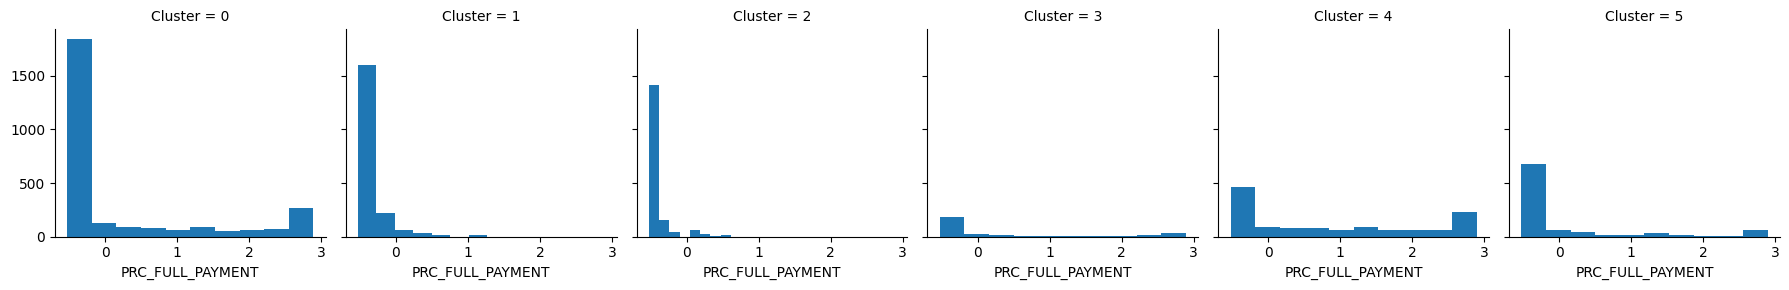

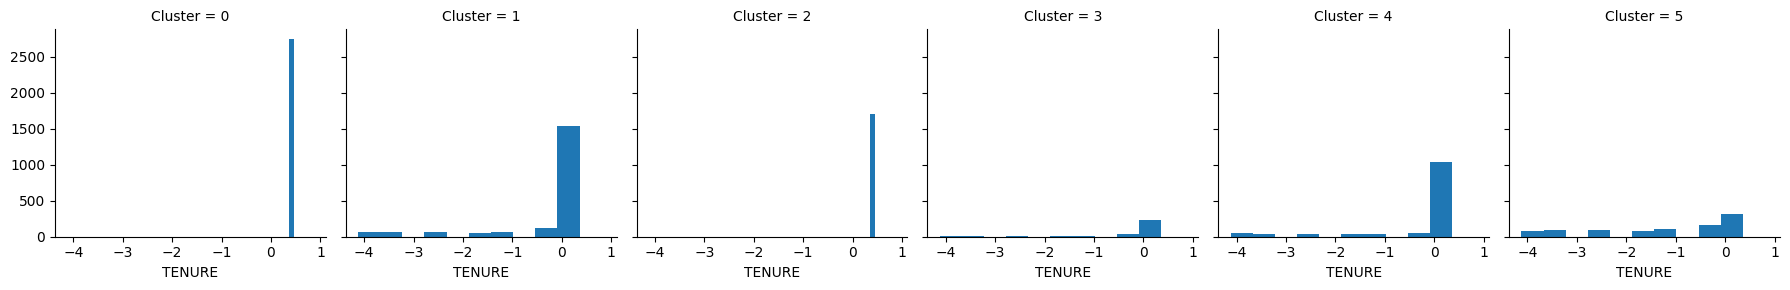

In [11]:
explain_clusters(data, gmmArray[4].predict(data))

In [12]:
gmm_silhouette, gmm_davies_bouldin, gmm_calinski_harabasz = evaluate_clustering(cluster_labels, data)
print(gmm_silhouette, gmm_davies_bouldin, gmm_calinski_harabasz)

0.04141023001974506 2.648453336166344 546.2625968435747


# Dataset 2

In [13]:
#EDA of 2nd dataset

data2.head(5)

,Customer Age,Gender,Education Level,Marital Status,Months on book,Credit Limit,Total Trans Amt,Total Trans Count,Minimum income,Max income
0,45,1,3,1,39,12691,1144,42,60000,80000
1,49,0,2,2,44,8256,1291,33,0,40000
2,51,1,2,1,36,3418,1887,20,80000,120000
3,40,0,3,3,34,3313,1171,20,0,40000
4,40,1,5,1,21,4716,816,28,60000,80000


In [14]:
#More rows than dataset 1, but fewer columns
data2.shape

(10127, 10)

In [15]:
#Some non-numeric data
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Customer Age       10127 non-null  int64
 1   Gender             10127 non-null  int32
 2   Education Level    10127 non-null  int32
 3   Marital Status     10127 non-null  int32
 4   Months on book     10127 non-null  int64
 5   Credit Limit       10127 non-null  int64
 6   Total Trans Amt    10127 non-null  int64
 7   Total Trans Count  10127 non-null  int64
 8   Minimum income     10127 non-null  int64
 9   Max income         10127 non-null  int64
dtypes: int32(3), int64(7)
memory usage: 672.6 KB


In [16]:
count_nulls(data2)

(0,
 Customer Age         0
 Gender               0
 Education Level      0
 Marital Status       0
 Months on book       0
 Credit Limit         0
 Total Trans Amt      0
 Total Trans Count    0
 Minimum income       0
 Max income           0
 dtype: int64)

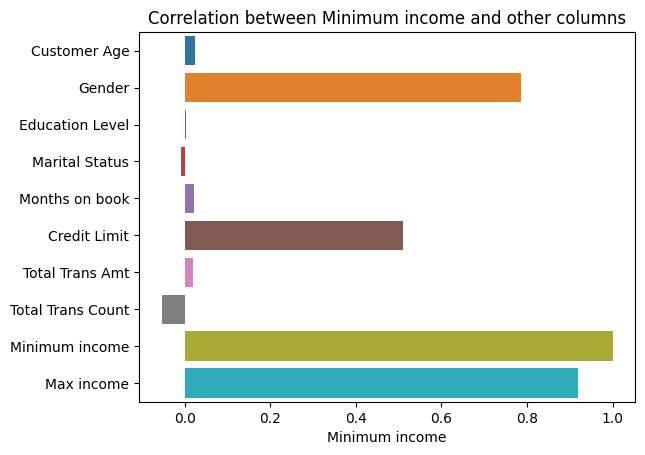

In [17]:
#Minimum income is moderately related to Credit Limit and strongly related to Max income
plot_correlation(data2numeric, 'Minimum income')

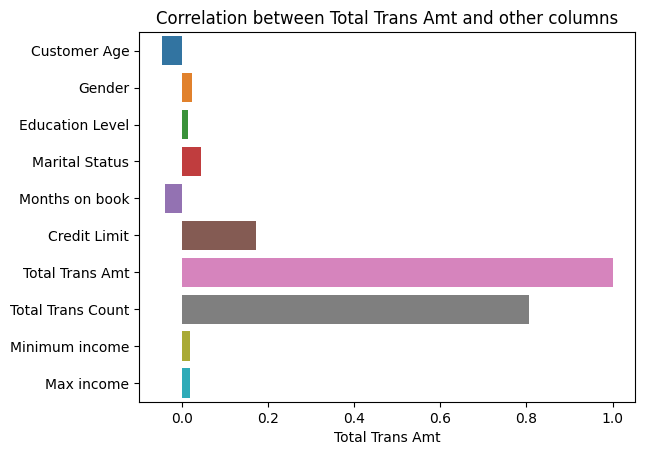

In [18]:
#Total Trans Amt is only strongly related to Total Trans Count
plot_correlation(data2numeric, 'Total Trans Amt')

In [19]:
data2numeric.describe()

,Customer Age,Gender,Education Level,Marital Status,Months on book,Credit Limit,Total Trans Amt,Total Trans Count,Minimum income,Max income
count,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04
mean,1.333101e-16,6.735667e-17,2.385549e-17,5.893709e-17,-3.381866e-16,8.980890e-17,-8.980890e-17,-2.245222e-16,8.419584e-17,-7.296973e-17
std,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00
min,-2.535541e+00,-9.434357e-01,-1.687762e+00,-1.983561e+00,-2.871068e+00,-9.354598e-01,-1.146344e+00,-2.337256e+00,-9.386440e-01,-1.678353e+00
25%,-6.643815e-01,-9.434357e-01,-5.976783e-01,-6.281276e-01,-6.171294e-01,-6.562408e-01,-6.619405e-01,-8.460801e-01,-9.386440e-01,-6.050592e-01
50%,-4.066159e-02,-9.434357e-01,-5.263660e-02,-6.281276e-01,8.964513e-03,-4.383297e-01,-1.486877e-01,9.123036e-02,1.009063e-01,-6.841228e-02
75%,7.078024e-01,1.059956e+00,1.037447e+00,7.273056e-01,5.098397e-01,2.740339e-01,9.918090e-02,6.877007e-01,6.206814e-01,4.682347e-01
max,3.327426e+00,1.059956e+00,1.582489e+00,2.082739e+00,2.513340e+00,2.836565e+00,4.144855e+00,3.158792e+00,2.180007e+00,1.541529e+00


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


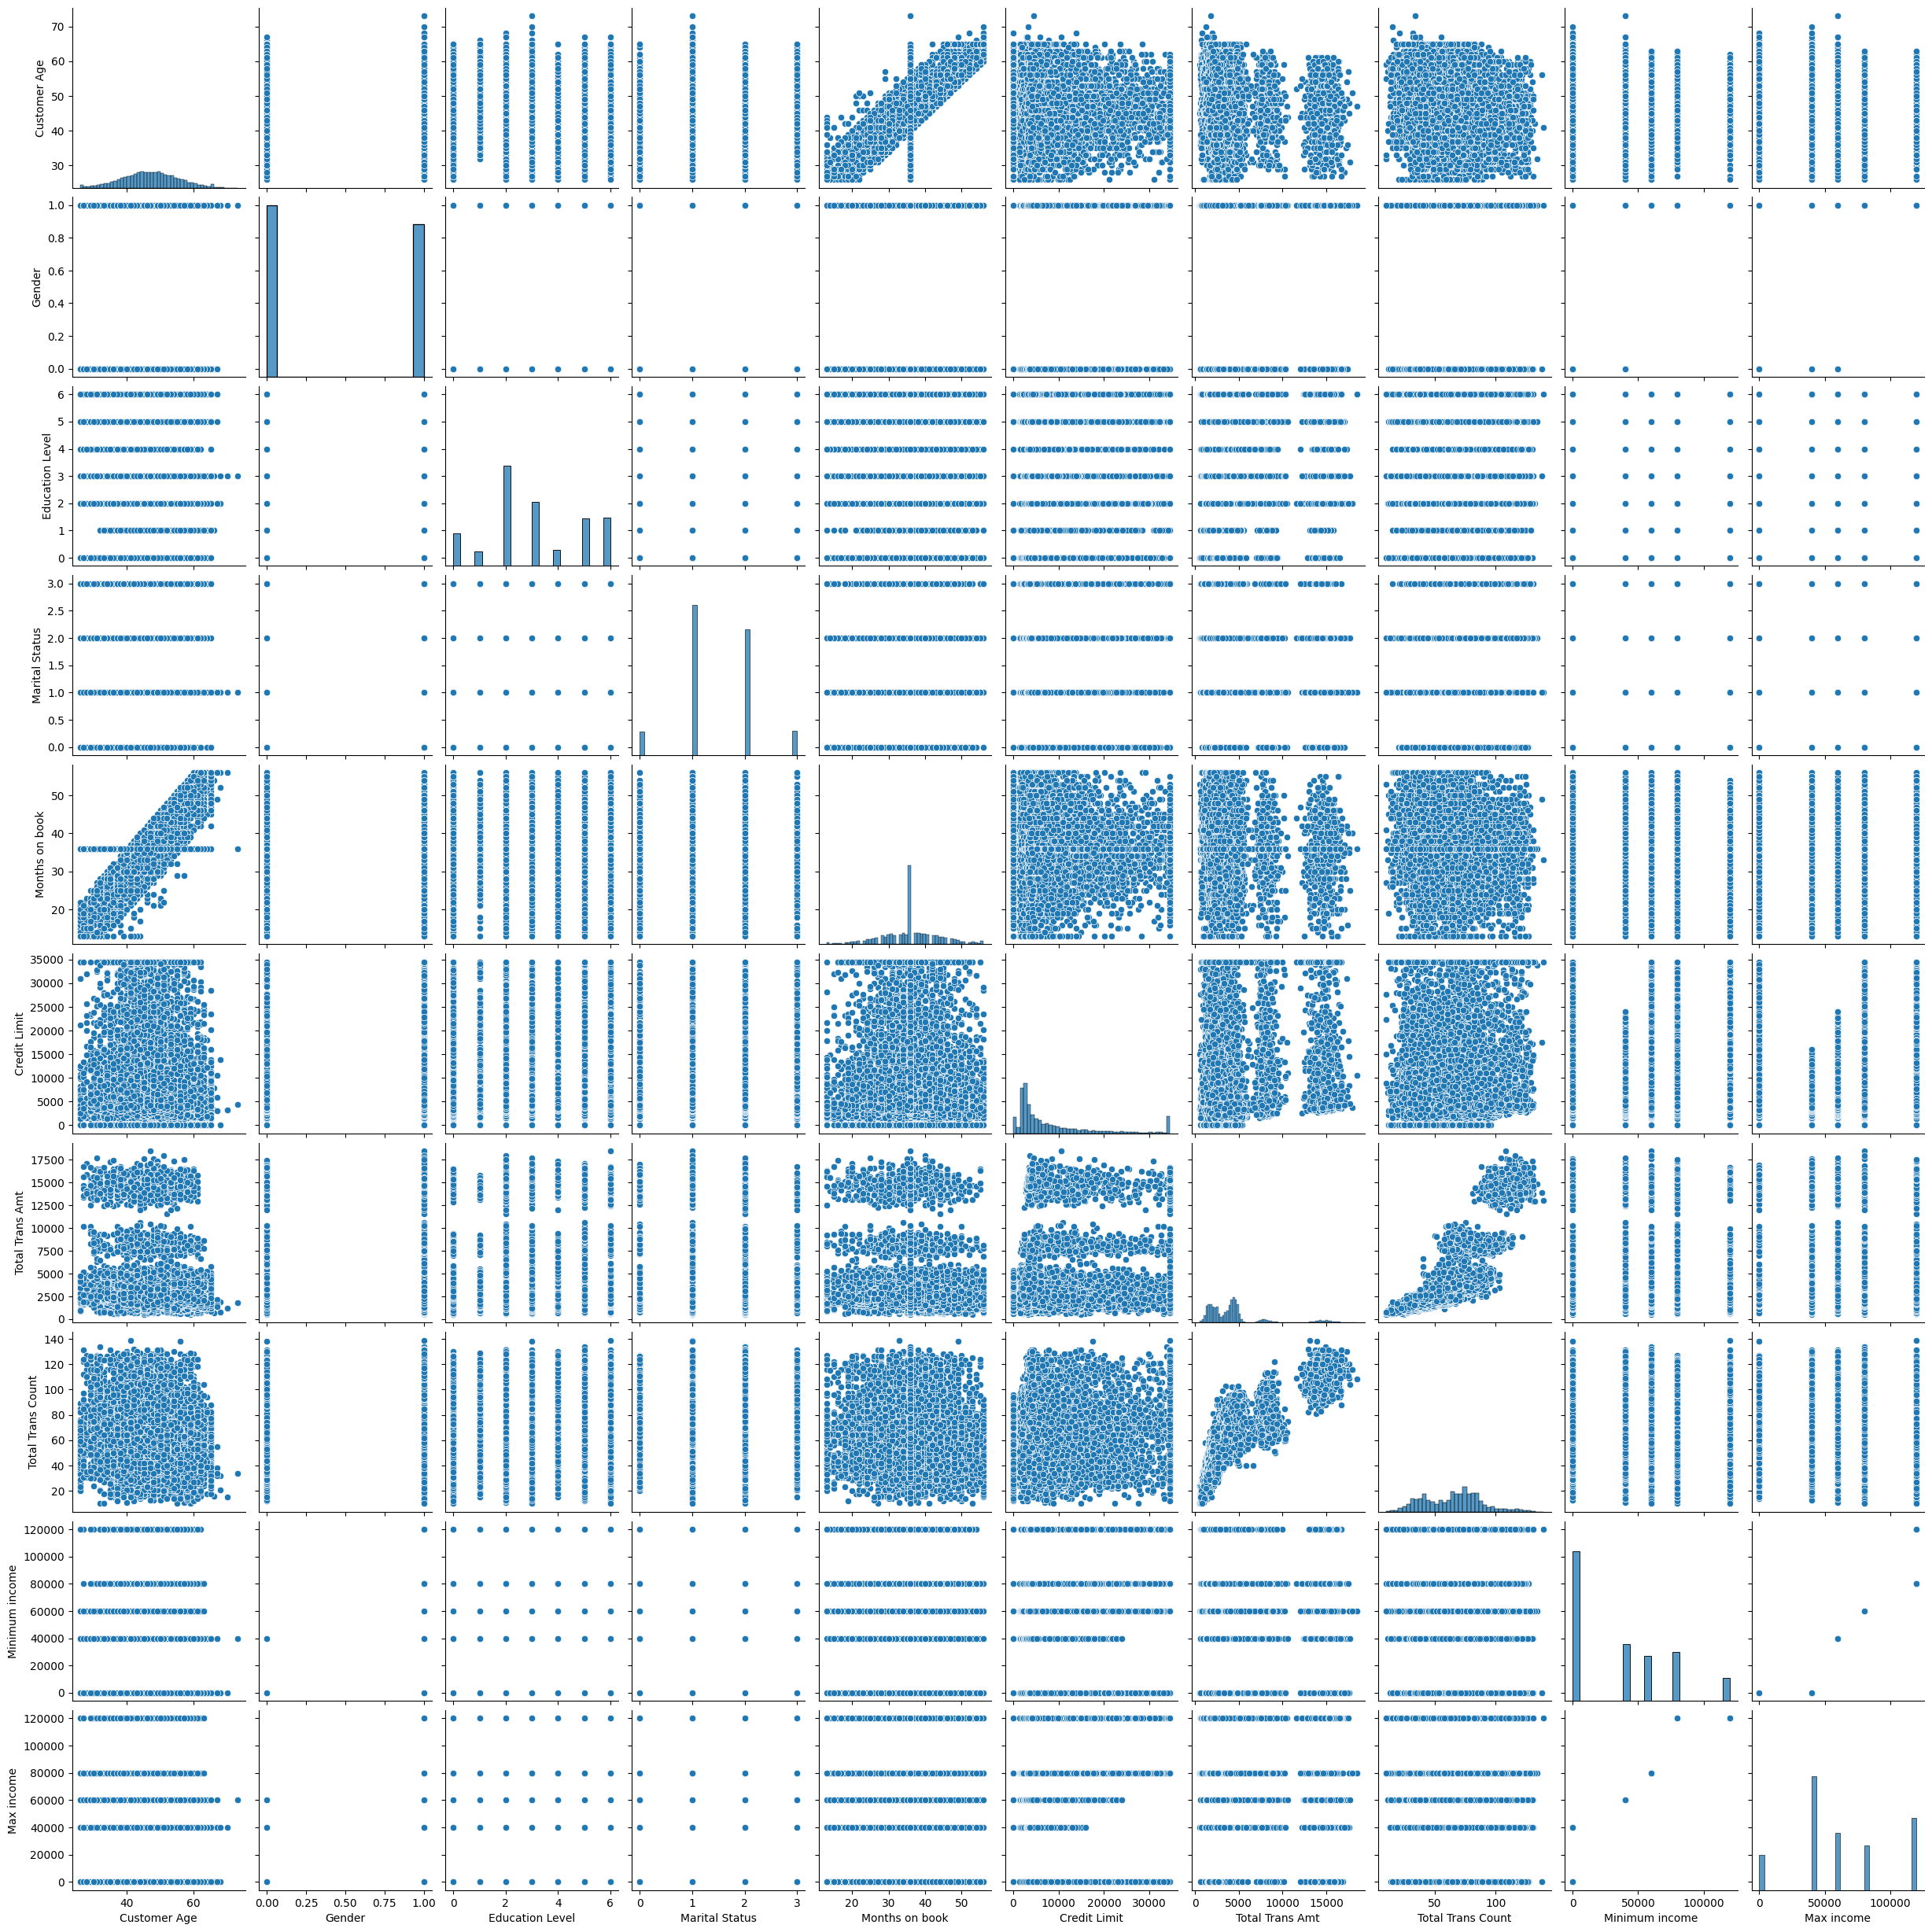

In [20]:
sns.pairplot(data2)

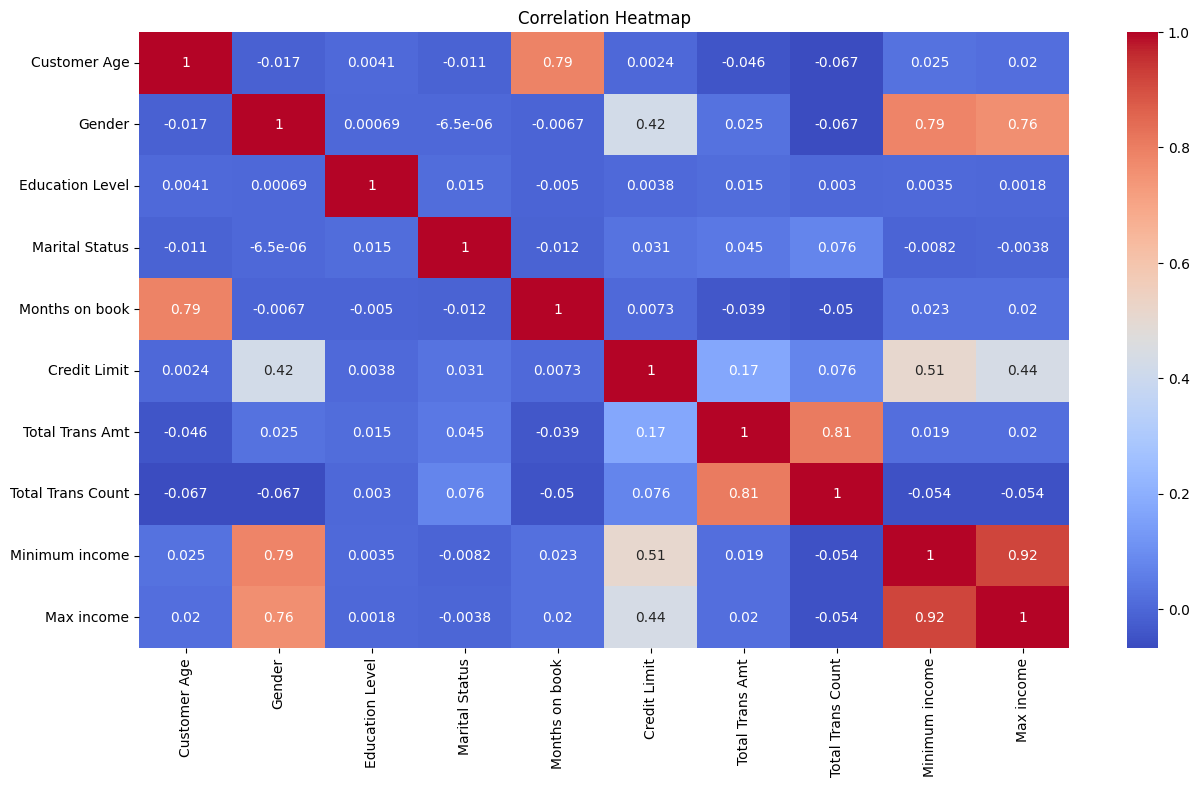

In [21]:
plot_corr_heatmap(data2numeric)

In [22]:
gmmArray2 = []
def elbowReportData2(inputData, n = gaussian_components):
    BICscores = []
    # training gaussian mixture model 

    clusters = range(2,n)
    #predictions from gmm
    for cluster in clusters:

        gmm = GaussianMixture(n_components=cluster)
        gmm.fit(inputData)
        BICscores.append(gmm.bic)
        labels = gmm.predict(inputData)
        gmmArray2.append(gmm)
        frame = pd.DataFrame(inputData)
        frame['cluster'] = labels
        frame.columns = [
            'Customer Age',
            'Gender',
            'Education Level',
            'Marital Status',
            'Months on book',
            'Credit Limit',
            'Total Trans Amt',
            'Total Trans Count',
            'Minimum income',
            'Max income',
            'cluster']
        
        color=['blue','green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white']

        data2 = inputData
        """for k in range(0,cluster):
            data2 = frame[frame["cluster"]==k]
            plt.scatter(data2["PAYMENTS"],data2["BALANCE"],c=color[k])
        print(str(cluster) + " clusters")
        plt.show()"""
    print(BICscores)
    return BICscores

In [23]:
data2scores = elbowReportData2(data2numeric)

[<bound method GaussianMixture.bic of GaussianMixture(n_components=2)>, <bound method GaussianMixture.bic of GaussianMixture(n_components=3)>, <bound method GaussianMixture.bic of GaussianMixture(n_components=4)>, <bound method GaussianMixture.bic of GaussianMixture(n_components=5)>, <bound method GaussianMixture.bic of GaussianMixture(n_components=6)>, <bound method GaussianMixture.bic of GaussianMixture(n_components=7)>, <bound method GaussianMixture.bic of GaussianMixture(n_components=8)>, <bound method GaussianMixture.bic of GaussianMixture(n_components=9)>, <bound method GaussianMixture.bic of GaussianMixture(n_components=10)>, <bound method GaussianMixture.bic of GaussianMixture(n_components=11)>, <bound method GaussianMixture.bic of GaussianMixture(n_components=12)>, <bound method GaussianMixture.bic of GaussianMixture(n_components=13)>, <bound method GaussianMixture.bic of GaussianMixture(n_components=14)>, <bound method GaussianMixture.bic of GaussianMixture(n_components=15)>,

In [24]:
data2BICscores = []
for i in range(0,gaussian_components - 2):
    data2BICscores.append(data2scores[i](data2numeric))

In [25]:
print(data2BICscores)

[93239.88210289697, 92799.66550753478, 32935.84580751548, 5540.946095736615, -47122.58005110829, -89623.44448667108, -95557.31876048847, -24438.304194079617, -104921.0165838509, -118294.52359540707, -118263.39421638838, -126012.46494812296, -130571.6650030849, -110949.30543193735, -115231.70852990329, -132377.1376588468, -129958.45272900524, -175809.84761114235]


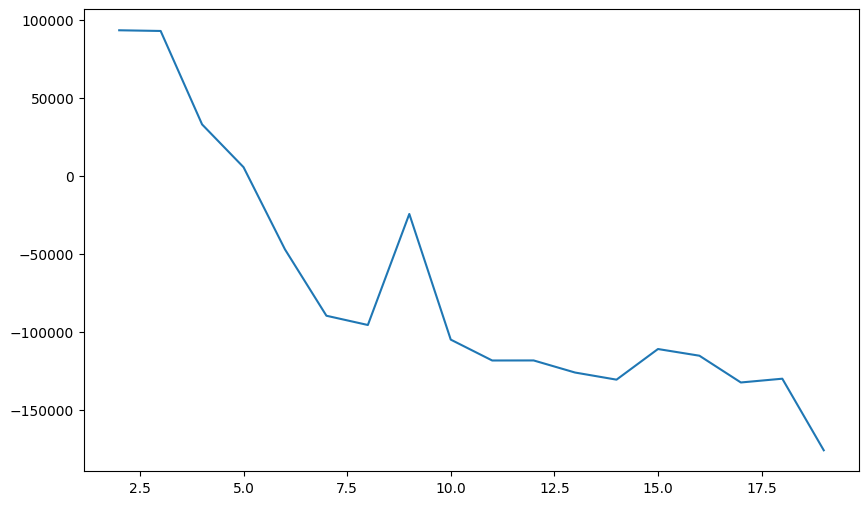

In [26]:
plt.figure(figsize = (10, 6))
plt.plot(range(2, gaussian_components), data2BICscores)

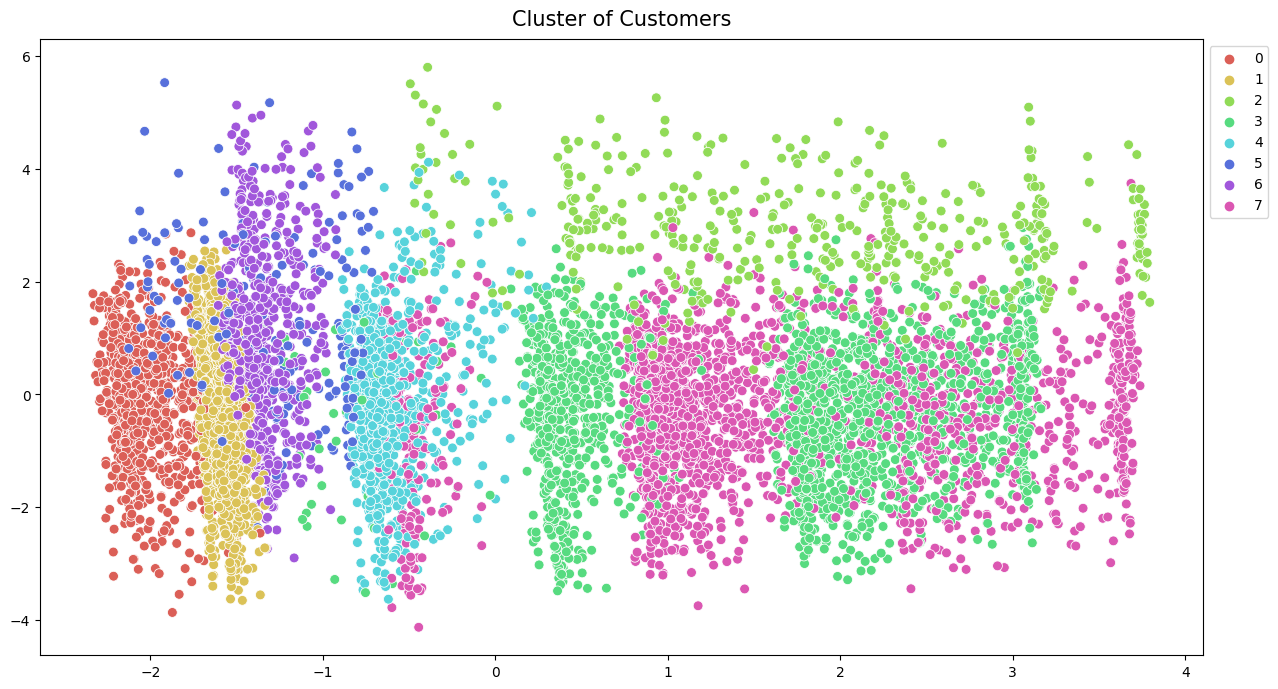

In [27]:
#Choose 8 components
cluster_labels2 = gmmArray2[6].predict(data2numeric)

dist2 = 1 - cosine_similarity(data2numeric)
pca2 = PCA(n_components = 2)
pca2.fit(dist2)
X_PCA2 = pca2.fit_transform(data2numeric)

# Visualizing all the clusters 
plt.figure(figsize=(15,8))
sns.scatterplot(x=X_PCA2[:, 0], y=X_PCA2[:, 1], 
                hue=cluster_labels2, palette=sns.color_palette('hls', 8), s=50)
plt.title('Cluster of Customers', size=15, pad=10)
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\AppData\Local\Pr

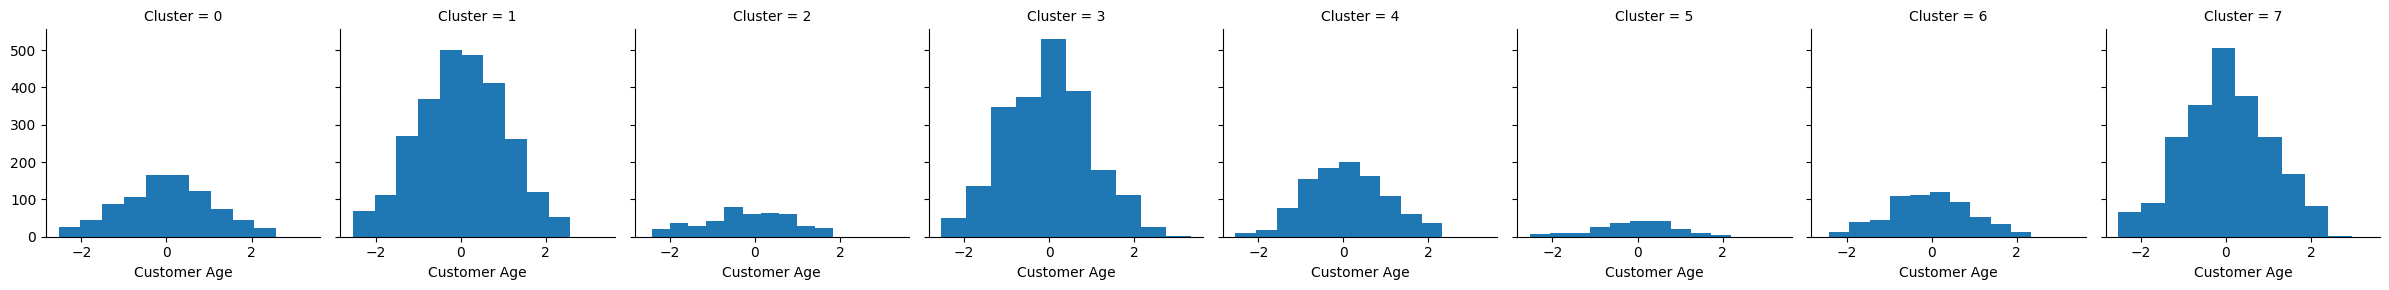

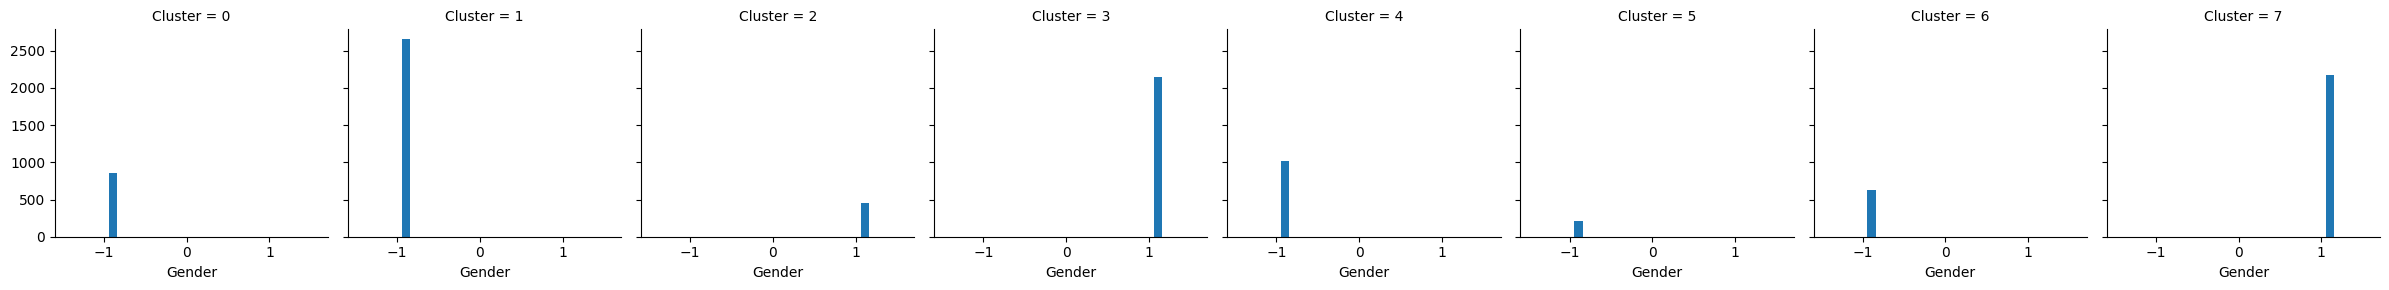

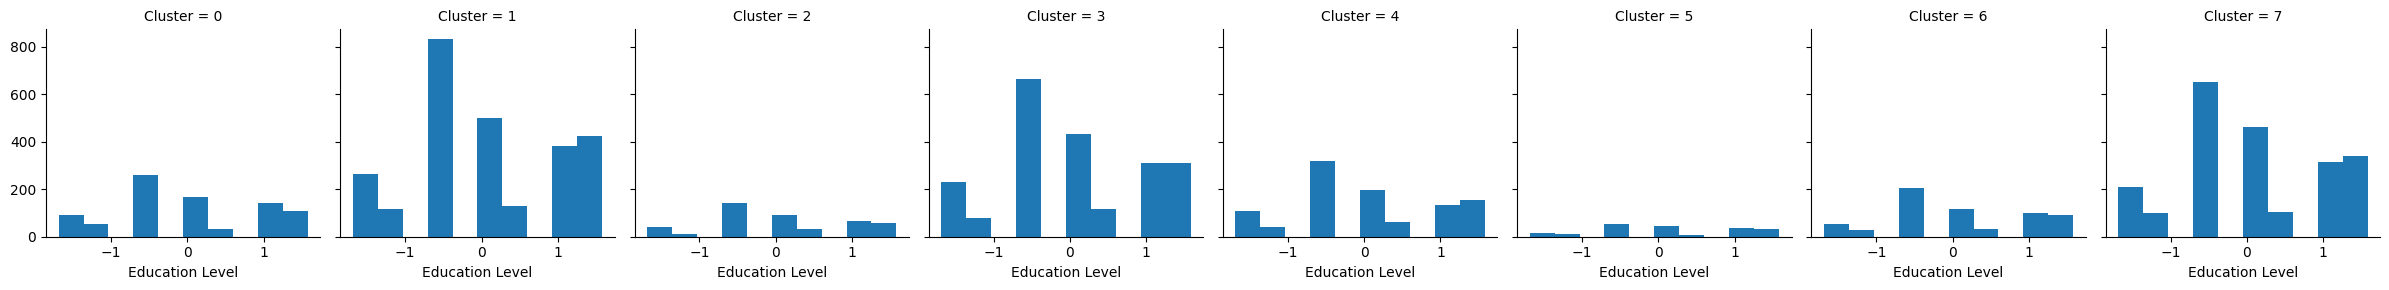

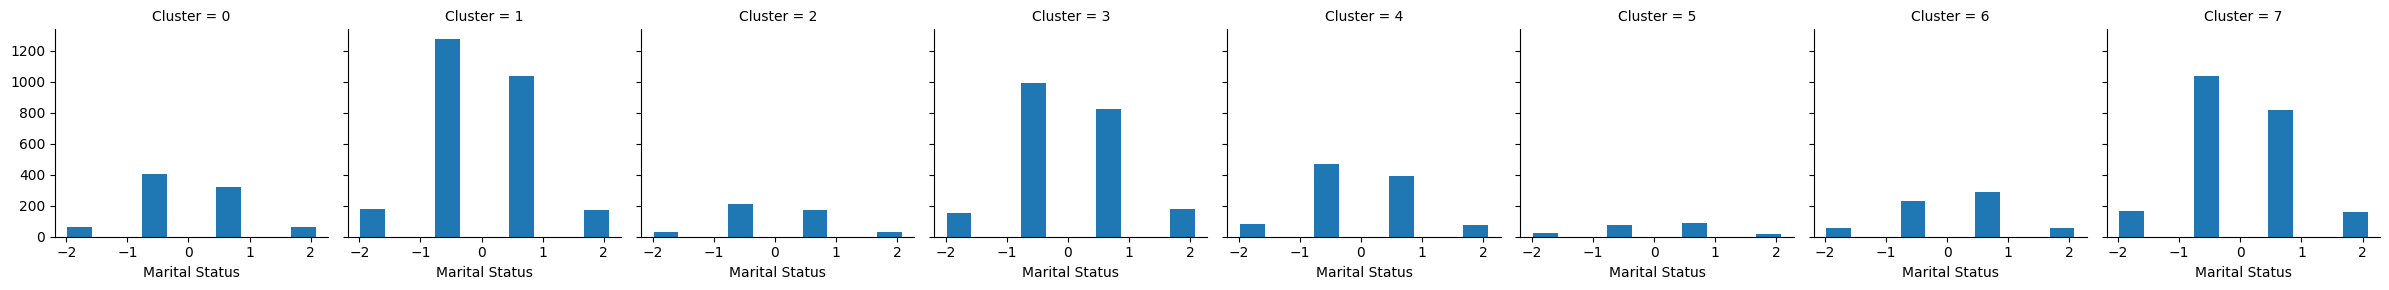

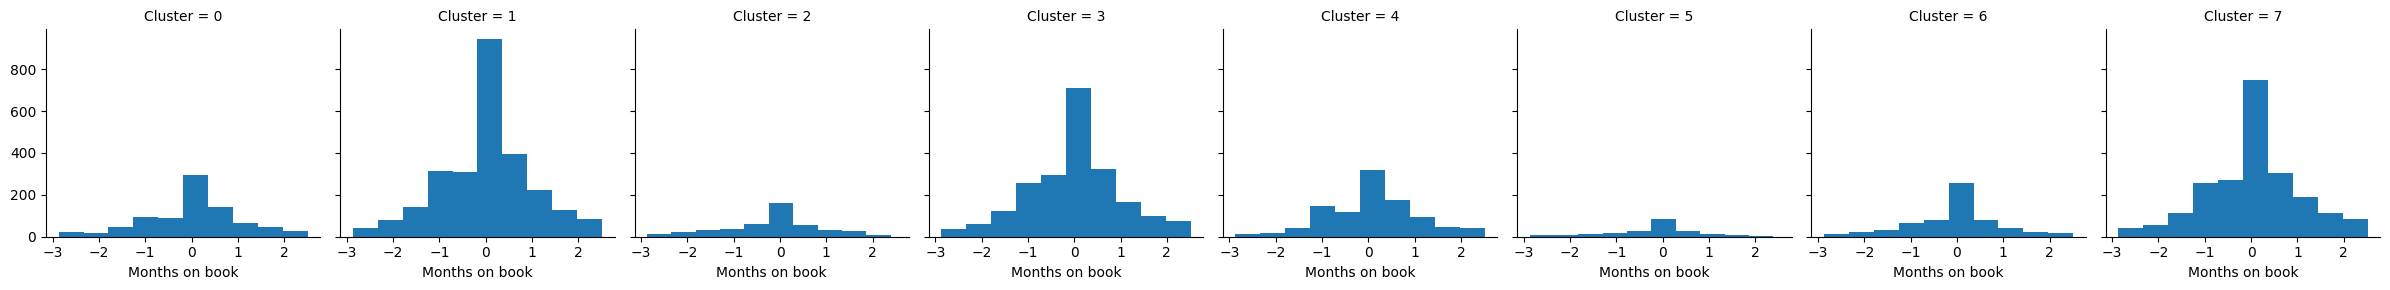

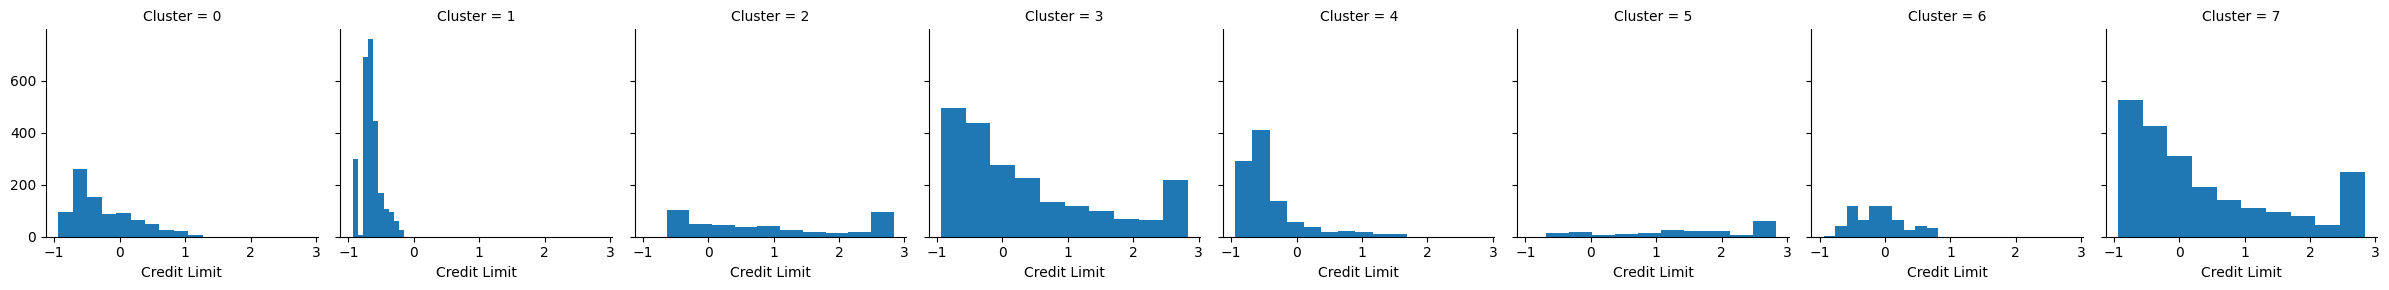

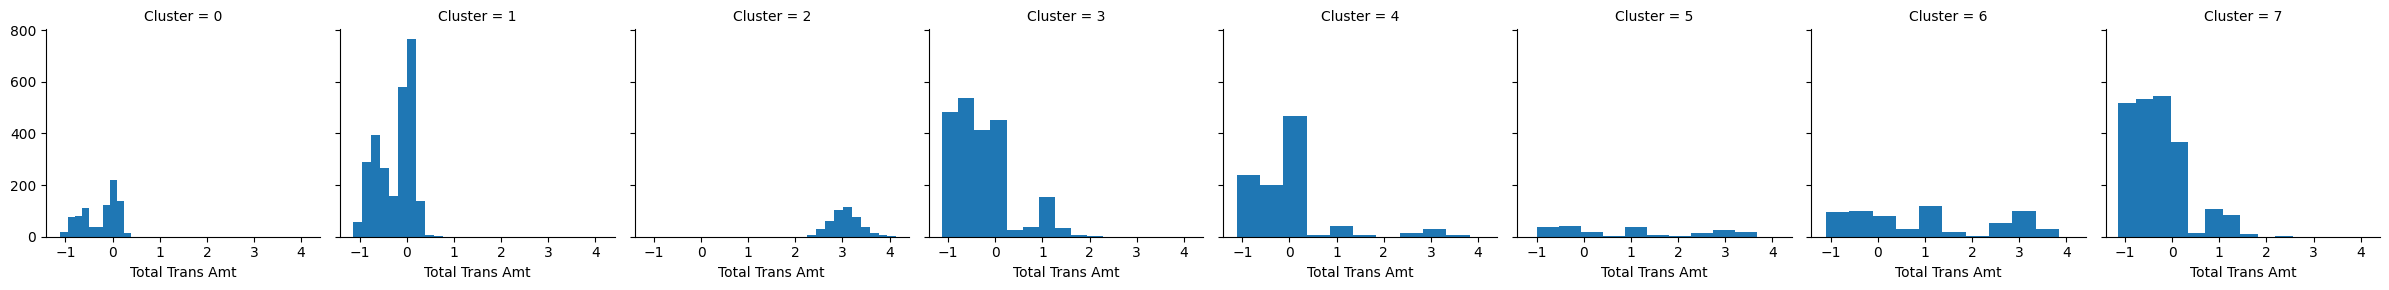

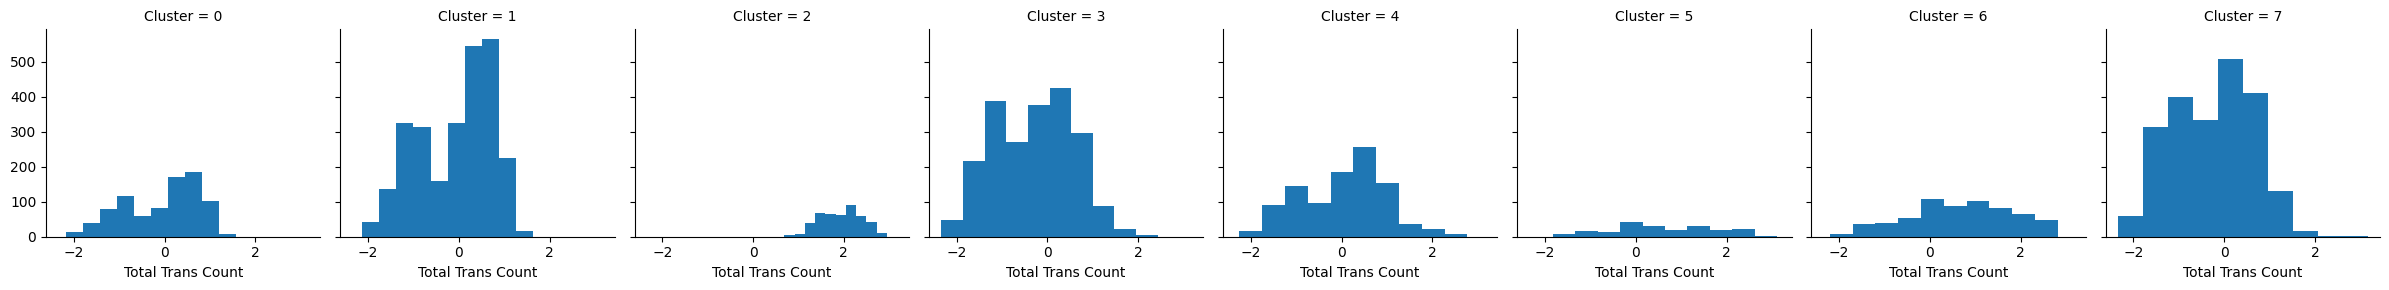

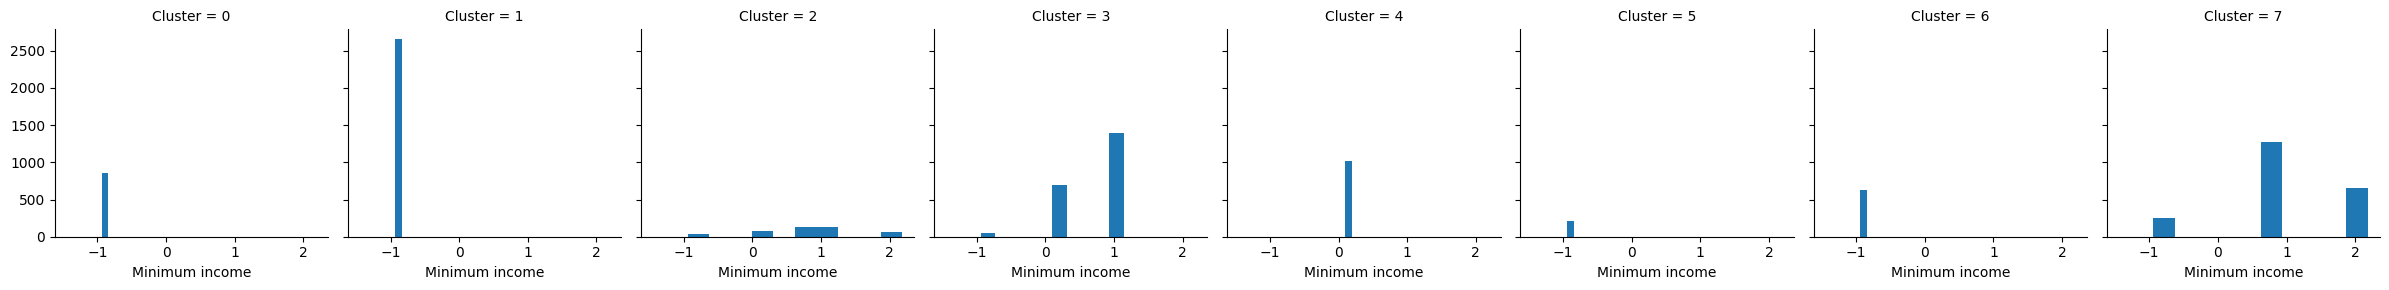

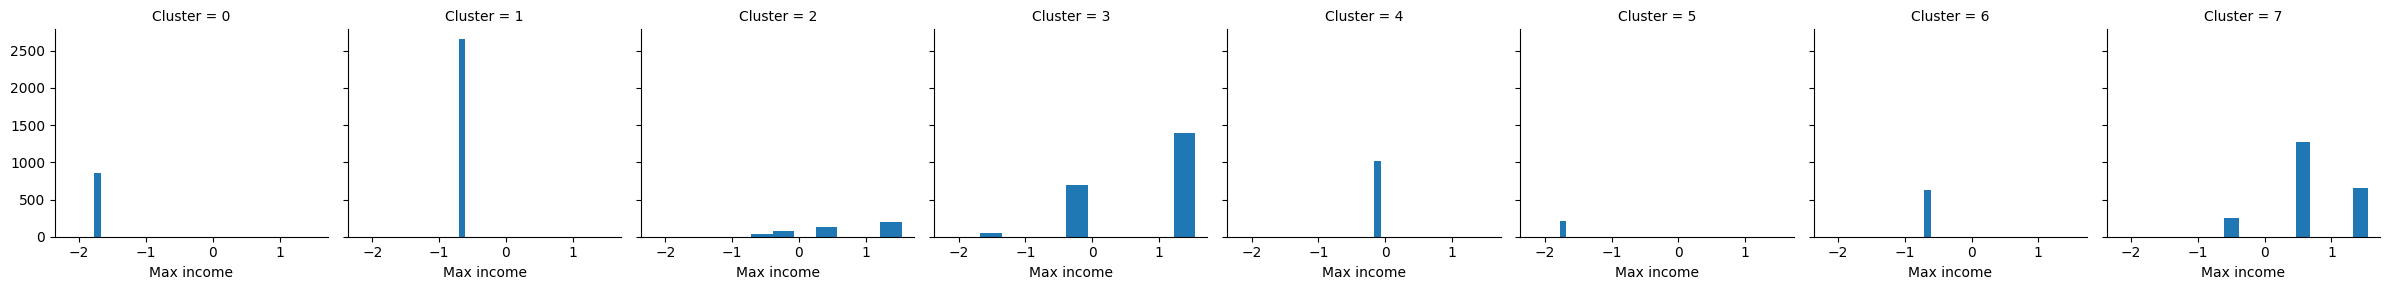

In [28]:
explain_clusters(data2numeric, gmmArray2[6].predict(data2numeric))

In [29]:
gmm2_silhouette, gmm2_davies_bouldin, gmm2_calinski_harabasz = evaluate_clustering(cluster_labels2, data2numeric)


In [30]:
print(gmm2_silhouette, gmm2_davies_bouldin, gmm2_calinski_harabasz)

0.04039532629530292 6.30810372338761 784.8488139774366
